<a href="https://colab.research.google.com/github/gurusakharwade/DB/blob/main/A3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn import datasets

In [ ]:
#data = datasets.load_boston()
data = datasets.fetch_california_housing()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
df.notnull()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
20635,True,True,True,True,True,True,True,True
20636,True,True,True,True,True,True,True,True
20637,True,True,True,True,True,True,True,True
20638,True,True,True,True,True,True,True,True


In [ ]:
df.dropna()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
q1 = df.Population.quantile(0.25)
q3 = df.Population.quantile(0.75)
q1, q3

(787.0, 1725.0)

In [ ]:
IQR = q3-q1
IQR

938.0

In [ ]:
lower_limit = q1-1.5*IQR
upper_limit = q3+1.5*IQR
lower_limit, upper_limit

(-620.0, 3132.0)

In [ ]:
df[(df.Population<lower_limit)|(df.Population>upper_limit)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
95,2.0096,36.0,2.294016,1.066294,3469.0,1.493328,37.80,-122.26
185,2.1917,43.0,4.844029,1.091795,4367.0,3.547522,37.79,-122.23
283,5.9849,22.0,6.528724,1.041179,4985.0,2.534316,37.79,-122.16
460,1.4012,52.0,3.105714,1.060000,3337.0,9.534286,37.87,-122.26
485,1.6307,35.0,2.962687,1.001148,3276.0,1.880597,37.86,-122.26
...,...,...,...,...,...,...,...,...
20543,1.7311,33.0,3.882852,1.029994,3717.0,2.103565,38.55,-121.74
20544,2.0650,23.0,4.803493,1.013646,6330.0,3.455240,38.55,-121.76
20563,3.1250,9.0,5.148007,1.119593,6837.0,2.899491,38.67,-121.75
20604,2.3496,17.0,4.551392,0.962527,3265.0,3.495717,39.12,-121.54


In [ ]:
df[(df.Population>lower_limit)&(df.Population<upper_limit)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
df['zscore'] = (df.Population-df.Population.mean())/df.Population.std()
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,zscore
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,-0.974405
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,0.861418
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,-0.820757
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,-0.766010
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,-0.759828
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,-0.512579
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,-0.944382
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,-0.369528
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,-0.604415


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


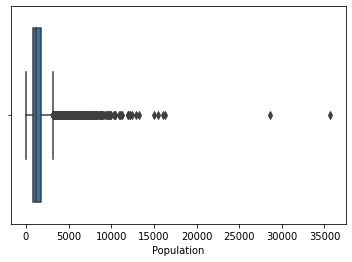

In [ ]:
sns.boxplot(df['Population'])